# Donchain Channel Indicator

https://admiralmarkets.com/education/articles/forex-indicators/what-everyone-should-know-about-the-donchian-channel-indicator

http://www.chart-formations.com/indicators/donchian-channel.aspx?cat=trend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'itc.ns'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,238.600006,238.600006,237.100006,238.100006,202.353333,4208837
2020-01-02 00:00:00+05:30,238.199997,240.949997,238.100006,239.850006,203.840622,8402979
2020-01-03 00:00:00+05:30,241.000000,241.000000,238.000000,238.500000,202.693283,9284478
2020-01-06 00:00:00+05:30,237.500000,238.300003,235.000000,235.100006,199.803726,7636617
2020-01-07 00:00:00+05:30,236.050003,237.899994,234.600006,235.350006,200.016205,8416741


In [3]:
df['Upper_Channel_Line'] = pd.Series.rolling(df['High'], window=20).max()
df['Lower_Channel_Line'] = pd.Series.rolling(df['Low'], window=20).min()
df['Middle_Channel_Line'] = (df['Upper_Channel_Line'] + df['Lower_Channel_Line'])/2
df = df.dropna()

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Upper_Channel_Line,Lower_Channel_Line,Middle_Channel_Line
Date,,,,,,,,,
2022-12-26 00:00:00+05:30,326.500000,335.100006,325.500000,334.600006,329.405029,9566210,347.350006,325.350006,336.350006
2022-12-27 00:00:00+05:30,335.600006,336.399994,330.149994,333.149994,327.977539,6727343,347.350006,325.350006,336.350006
2022-12-28 00:00:00+05:30,332.850006,335.000000,331.500000,334.399994,329.208130,7737562,347.350006,325.350006,336.350006
2022-12-29 00:00:00+05:30,334.350006,335.750000,331.549988,335.350006,330.143372,8105359,347.350006,325.350006,336.350006
2022-12-30 00:00:00+05:30,335.399994,336.750000,330.500000,331.549988,326.402374,6960264,347.350006,325.350006,336.350006


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


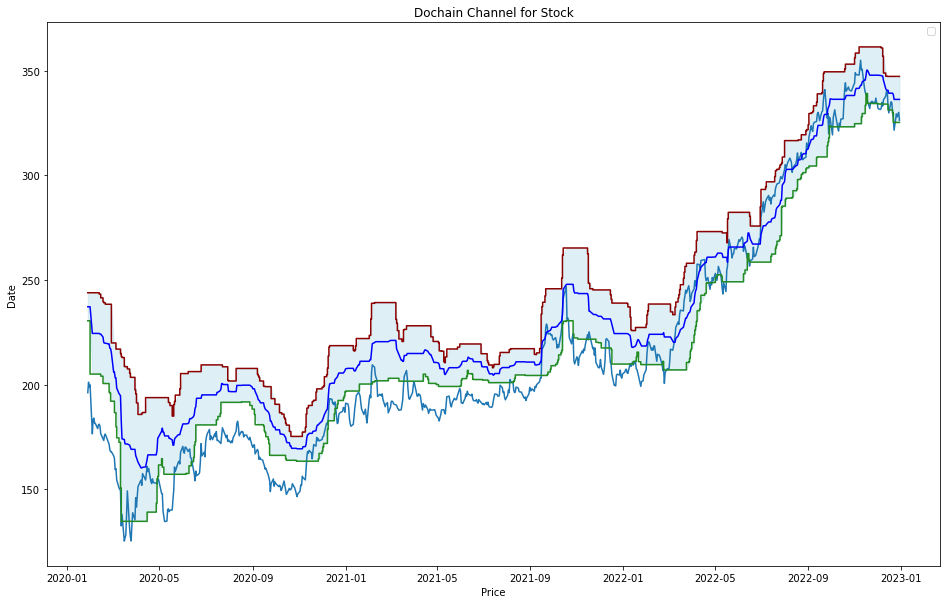

In [5]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.fill_between(df.index, df['Lower_Channel_Line'], df['Upper_Channel_Line'],  color='lightblue', alpha=0.4)
plt.plot(df['Upper_Channel_Line'], c='darkred', linestyle='-', drawstyle="steps")
plt.plot(df['Lower_Channel_Line'], c='forestgreen', linestyle='-', drawstyle="steps")
plt.plot(df['Middle_Channel_Line'], c='blue', linestyle='-')
plt.title('Dochain Channel for Stock')
plt.legend(loc='best')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

## Candlestick with Donchain Channel

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Upper_Channel_Line,Lower_Channel_Line,Middle_Channel_Line,VolumePositive
0,18288.770833,234.750000,235.899994,230.500000,230.750000,196.106812,14582907,243.899994,230.5,237.199997,False
1,18289.770833,231.500000,237.649994,231.149994,236.649994,201.121017,20469708,243.899994,230.5,237.199997,False
2,18290.770833,236.949997,237.000000,233.000000,234.050003,198.911362,10394149,243.899994,230.5,237.199997,False
3,18291.770833,235.750000,238.399994,234.050003,235.149994,199.846222,18455880,243.899994,230.5,237.199997,False
4,18294.770833,215.000000,216.899994,205.000000,207.600006,176.432388,79764370,243.899994,205.0,224.449997,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


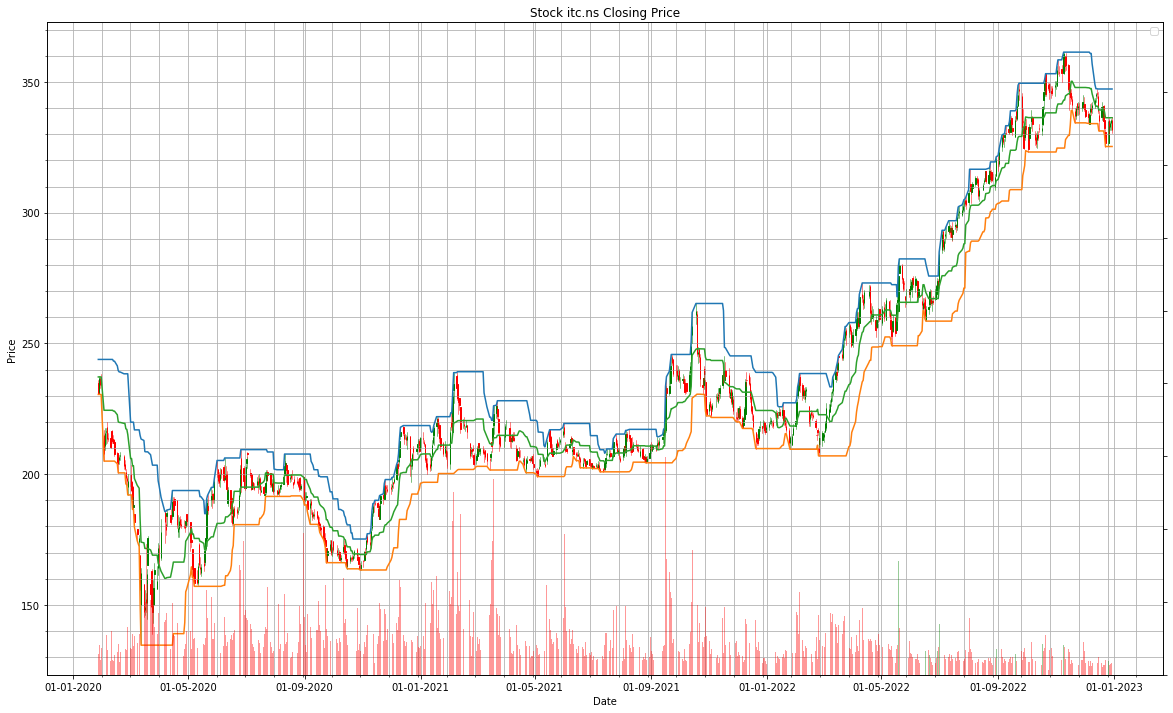

In [8]:
from mpl_finance import candlestick_ohlc

fig, ax1 = plt.subplots(figsize=(20,12))
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
#colors = ['red', 'green', 'blue']
#labels = ['Upper Channel Line', 'Lower Channel Line', 'Middle Channel Line']
for i in dfc[['Upper_Channel_Line', 'Lower_Channel_Line', 'Middle_Channel_Line']]:
    ax1.plot(dfc['Date'], dfc[i])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')